In [9]:
import pandas as pd
import geopandas as gpd

In [73]:
f = pd.read_excel('Flanders-Raw.xlsx').drop('Centrumstad?', axis =1)
f = f.query('Reeks == "Totaal"')
f = f[f['Jaar'].isin([2019, 2020])].drop(['Reeks', 'Indicator'], axis =1)
f['Procent'] = f['Procent'] * 100
f = f.pivot_table(index = ['Gemeente', 'Nis-code'], columns = 'Jaar', values = 'Procent').reset_index()
f

Jaar,Gemeente,Nis-code,2019,2020
0,Aalst,41002,7.01632,7.37598
1,Aalter,44084,2.90799,3.24322
2,Aarschot,24001,4.43658,4.54873
3,Aartselaar,11001,4.26810,5.19702
4,Affligem,23105,3.89300,4.07327
...,...,...,...,...
296,Zulte,44081,3.14811,3.33069
297,Zutendaal,71067,5.69743,5.90810
298,Zwalm,45065,3.37386,3.48089
299,Zwevegem,34042,3.21006,3.09257


In [74]:
f.to_excel('Flanders-cleaned.xlsx', index = False)

In [75]:
g = gpd.read_file('shapefile/Shapefile/Refgem.shp')
g['NISCODE'] = pd.to_numeric(g['NISCODE'])
g.head(3)

,OIDN,UIDN,VERSDATUM,TERRID,NISCODE,NAAM,DATPUBLBS,NUMAC,LENGTE,OPPERVL,geometry
0,278.0,727.0,1900-01-01,1,13001,Arendonk,1976-01-23,1975123003,32356.181109,5.500452e+07,"POLYGON ((203378.850 223128.860, 203380.195 22..."
1,209.0,517.0,1900-01-01,2,13031,Oud-Turnhout,1982-12-29,1982001920,33491.154251,3.917071e+07,"POLYGON ((191896.098 228261.046, 191910.672 22..."
2,67.0,655.0,1900-01-01,3,13025,Mol,1831-02-07,None,78267.605938,1.145177e+08,"POLYGON ((210668.234 217185.608, 210616.966 21..."


In [79]:
g = g[['NISCODE', 'geometry', 'NAAM']]
g['country'] = 'Belgium-flanders'
g.rename({"NISCODE": "NUTS_ID"}, axis =1, inplace = True)
g

,NUTS_ID,geometry,NAAM,country
0,13001,"POLYGON ((203378.850 223128.860, 203380.195 22...",Arendonk,Belgium-flanders
1,13031,"POLYGON ((191896.098 228261.046, 191910.672 22...",Oud-Turnhout,Belgium-flanders
2,13025,"POLYGON ((210668.234 217185.608, 210616.966 21...",Mol,Belgium-flanders
3,72037,"POLYGON ((229442.220 221344.470, 230005.370 22...",Hamont-Achel,Belgium-flanders
4,13036,"POLYGON ((200827.109 220823.391, 201189.141 22...",Retie,Belgium-flanders
...,...,...,...,...
295,45068,"POLYGON ((91896.328 182825.531, 91888.602 1828...",Kruisem,Belgium-flanders
296,44084,"POLYGON ((83001.837 205969.658, 83118.393 2058...",Aalter,Belgium-flanders
297,44083,"POLYGON ((95109.714 199163.599, 95150.672 1991...",Deinze,Belgium-flanders
298,12041,"POLYGON ((147837.407 198526.766, 148031.891 19...",Puurs-Sint-Amands,Belgium-flanders


In [65]:
flanders = gpd.GeoDataFrame(pd.merge(f, g, left_on = 'Nis-code', right_on = 'NISCODE'))

<AxesSubplot:>

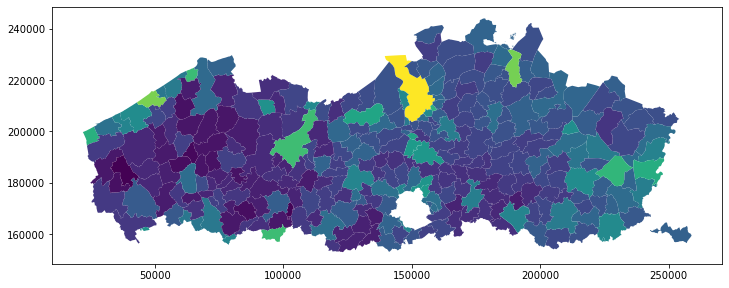

In [67]:
flanders.plot(column = 2020, figsize = (12,12))